## Declaração de bibliotecas e demais configurações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import csv
from sklearn import svm

from matplotlib import rcParams
rcParams['text.usetex'] = True
rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

## Funções relacionadas ao método ou auxiliares

In [2]:
#Função de leitura dos dados------------------------------------
def read_class_data(path):
    with open(path, newline='') as f:
        reader = csv.reader(f,delimiter=',')
        for row in reader:
            try:
                data = np.vstack( (data , np.asarray(row).astype(np.float) ) )
            except:
                data = np.asarray(row).astype(np.float)
    f.close()
    y = data[:,0]
    x = data[:,1:]
    return y,x

## Leitura dos dados
* Fazemos aqui a leitura dos dados simulados no 'juputer-notebook':"Pratica-SepLin-SimulacaoDados"
* $\texttt{path_D}$ corresponde aos dados de treinamento
* $\texttt{path_I}$ corresponde aos dados usados para avaliação do método

In [3]:
#Dados de treinamento
path_D = 'saidaSim_D_SepLin.txt'

#Dados de avaliação
path_I = 'saidaSim_I_SepLin.txt'

#Leitura dos dados
yD,xD = read_class_data(path_D)
yI,xI = read_class_data(path_I)

## Classificação dos dados
* $\texttt{g}$ é uma instanciação gerada via svm.SVC
* $C=100$ e $\texttt{kernel='linear'}$ são parâmetros do método
* $\texttt{decision_function_shape='ovr'}$ determina o uso da estratégia 'ovr'
* O Treinamento é efetuado pelo método 'fit'

In [4]:
g = svm.SVC(C=100,kernel='linear',decision_function_shape='ovo')
g.fit(xD,yD)

SVC(C=100, decision_function_shape='ovo', kernel='linear')

## Classificação do espaço de atributos 
### (na verdade, vamos classificar um conjunto ampo de elementos neste espaço!)
* Como já sabemos, a classificação (predição) é realizada pelo método 'predict'
* Para fins de visualização,é preciso compatibilizar os elementos (veja código)

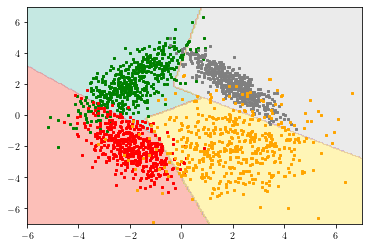

In [5]:
N = 200
minX, maxX = np.floor(np.min(xI[:,0])), np.ceil(np.max(xI[:,0]))
minY, maxY = np.floor(np.min(xI[:,1])), np.ceil(np.max(xI[:,1]))

N = 200
X1 = np.linspace(minX, maxX,N)
X2 = np.linspace(minY, maxY,N)
X1, X2 = np.meshgrid(X1, X2)

cla = np.ndarray((N,N))
for i in range(0,N):
    for j in range(0,N):
        cla[i,j] = g.predict( [ [X1[i,j] , X2[i,j]] ] ) 

plt.contourf(X1, X2, cla, cmap=cm.Set3,alpha=0.5)

plt.plot( xI[np.where(yI == +1), 0], xI[np.where(yI == +1), 1], 's', color='green', markersize=2)
plt.plot( xI[np.where(yI == +2), 0], xI[np.where(yI == +2), 1], 's', color='red', markersize=2)
plt.plot( xI[np.where(yI == +3), 0], xI[np.where(yI == +3), 1], 's', color='grey', markersize=2)
plt.plot( xI[np.where(yI == +4), 0], xI[np.where(yI == +4), 1], 's', color='orange', markersize=2)

plt.show()

## Vamos repetir o processo, agora com a estratégia OVR
* Com uso do kernel linear, é esperado que as alterações no resultados sejam mínimas (caso ocorram)

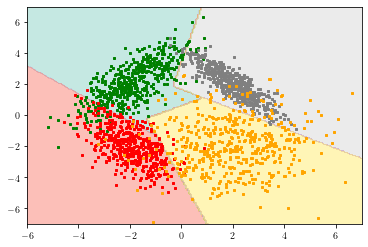

In [6]:
g = svm.SVC(C=1000,kernel='linear',decision_function_shape='ovr')
g.fit(xD,yD)

N = 400
minX, maxX = np.floor(np.min(xI[:,0])), np.ceil(np.max(xI[:,0]))
minY, maxY = np.floor(np.min(xI[:,1])), np.ceil(np.max(xI[:,1]))

N = 200
X1 = np.linspace(minX, maxX,N)
X2 = np.linspace(minY, maxY,N)
X1, X2 = np.meshgrid(X1, X2)

cla = np.ndarray((N,N))
for i in range(0,N):
    for j in range(0,N):
        cla[i,j] = g.predict( [ [X1[i,j] , X2[i,j]] ] ) 

plt.contourf(X1, X2, cla, cmap=cm.Set3,alpha=0.5)

plt.plot( xI[np.where(yI == +1), 0], xI[np.where(yI == +1), 1], 's', color='green', markersize=2)
plt.plot( xI[np.where(yI == +2), 0], xI[np.where(yI == +2), 1], 's', color='red', markersize=2)
plt.plot( xI[np.where(yI == +3), 0], xI[np.where(yI == +3), 1], 's', color='grey', markersize=2)
plt.plot( xI[np.where(yI == +4), 0], xI[np.where(yI == +4), 1], 's', color='orange', markersize=2)

plt.show()